# Predicting NBA Player's Salary

Dataset: nba_salaries.csv

___________________________________________________________________________________________________________________________________________________________________________________________________

Importing Libraries

In [1]:
#import most of the necessary libraries here and import more niche ones as needed later on
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

Dataframe

In [2]:
#make the dataset into a dataframe so that it's actually usable
df = pd.read_csv("nba_salaries.csv") #note that the dataset was obtained through kaggle
df

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,grayra01


Churning the Dataframe

In [3]:
#churn it and take what is actually necessary, I've deemed these stats to be important for reasons I will expand on when I present 
churn_df = df[["Salary", "Age", "GP", "MP", "PTS", "AST", "TRB", "TOV", "BLK", "STL"]]
churn_df

,Salary,Age,GP,MP,PTS,AST,TRB,TOV,BLK,STL
0,48070014,34,56,34.7,29.4,6.3,6.1,3.2,0.4,0.9
1,47345760,32,34,22.2,11.4,5.2,2.7,2.4,0.4,0.8
2,47080179,34,73,29.1,15.9,7.5,5.8,3.5,0.5,1.0
3,44474988,38,55,35.5,28.9,6.8,8.3,3.2,0.6,0.9
4,44119845,34,47,35.6,29.1,5.0,6.7,3.3,1.4,0.7
...,...,...,...,...,...,...,...,...,...,...
462,35096,23,4,22.3,4.3,1.0,3.8,1.0,1.3,0.5
463,32795,25,5,5.6,1.0,1.0,0.8,0.2,0.4,0.0
464,32171,29,3,18.7,8.0,1.7,2.0,0.0,0.0,0.7
465,5849,23,1,35.0,16.0,7.0,9.0,4.0,1.0,0.0


Ploting graphs

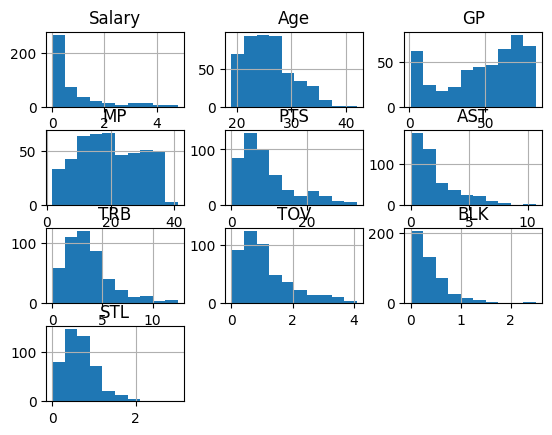

In [4]:
#plotting each variable which provides a general view of what the data looks like, this is so I can determine what model to use (or more so whether I should change the model I'm currently using)
viz = churn_df[["Salary", "Age", "GP", "MP", "PTS", "AST", "TRB", "TOV", "BLK", "STL"]]
viz.hist()
plt.show()

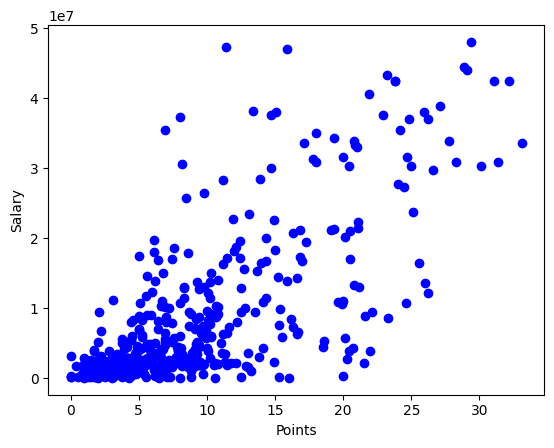

In [5]:
#plotting each independent varible against the dependent varible to see the relation between them
plt.scatter(churn_df.PTS, churn_df.Salary,  color='blue')
plt.xlabel("Points")
plt.ylabel("Salary")
plt.show()

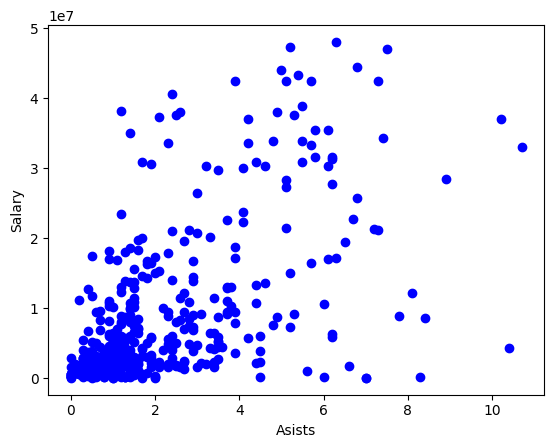

In [6]:
plt.scatter(churn_df.AST, churn_df.Salary,  color='blue')
plt.xlabel("Asists")
plt.ylabel("Salary")
plt.show()

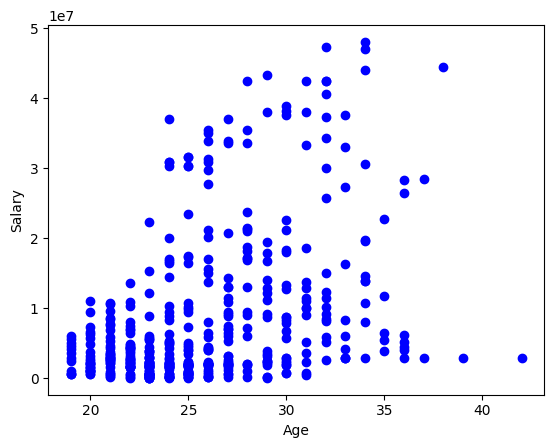

In [7]:
plt.scatter(churn_df.Age, churn_df.Salary,  color='blue')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

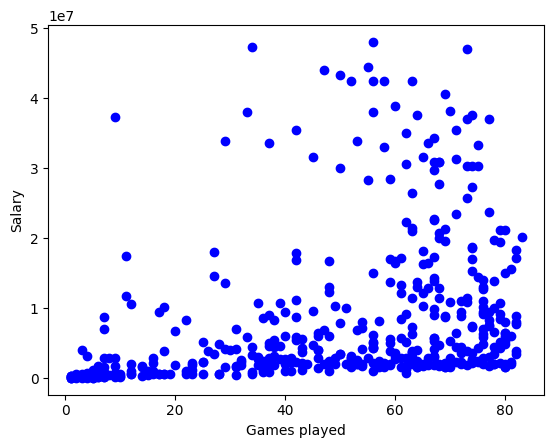

In [8]:
plt.scatter(churn_df.GP, churn_df.Salary,  color='blue')
plt.xlabel("Games played")
plt.ylabel("Salary")
plt.show()

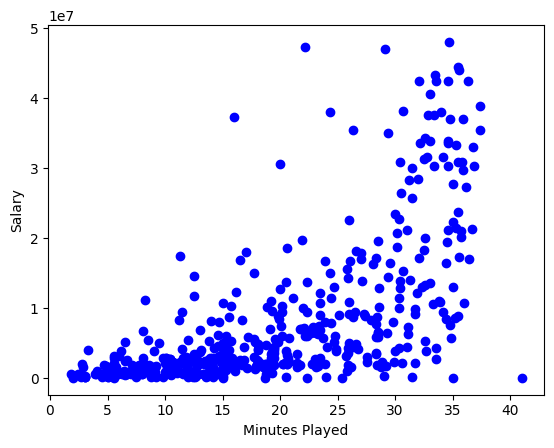

In [9]:
plt.scatter(churn_df.MP, churn_df.Salary,  color='blue')
plt.xlabel("Minutes Played")
plt.ylabel("Salary")
plt.show()

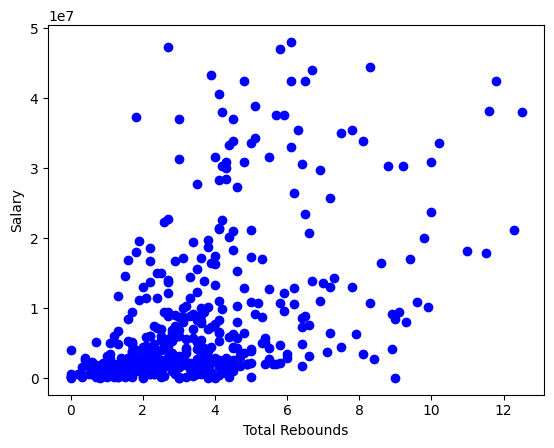

In [10]:
plt.scatter(churn_df.TRB, churn_df.Salary,  color='blue')
plt.xlabel("Total Rebounds")
plt.ylabel("Salary")
plt.show()

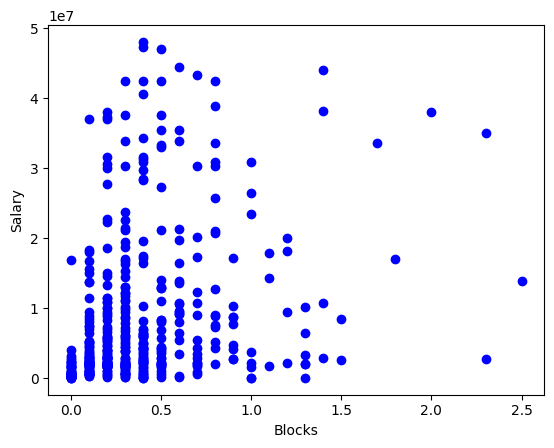

In [11]:
plt.scatter(churn_df.BLK, churn_df.Salary,  color='blue')
plt.xlabel("Blocks")
plt.ylabel("Salary")
plt.show()

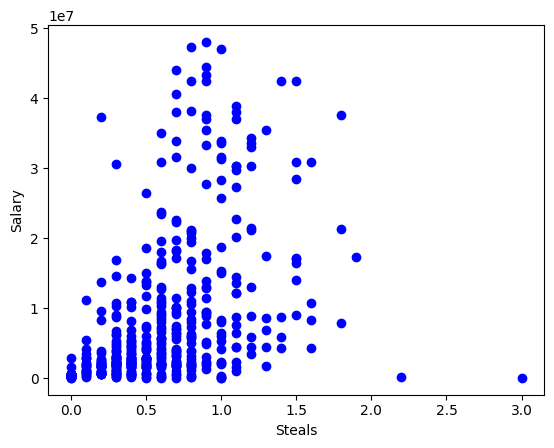

In [12]:
plt.scatter(churn_df.STL, churn_df.Salary,  color='blue')
plt.xlabel("Steals")
plt.ylabel("Salary")
plt.show()

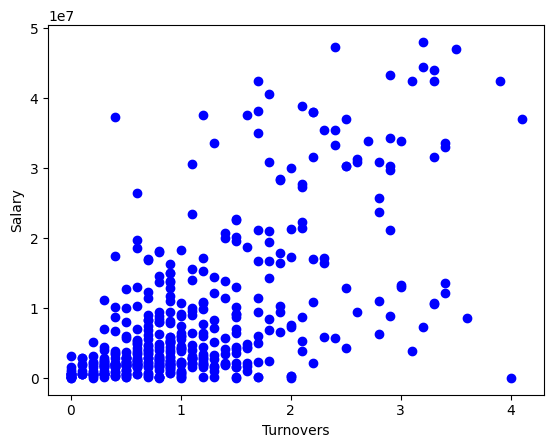

In [13]:
plt.scatter(churn_df.TOV, churn_df.Salary,  color='blue')
plt.xlabel("Turnovers")
plt.ylabel("Salary")
plt.show()

Training the Dataset

In [14]:
#sorting the data into the necessary format
msk = np.random.rand(len(df)) < 0.8
train = churn_df[msk]
test = churn_df[~msk]

In [15]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X = np.asanyarray(train[["Age", "GP", "MP", "PTS", "AST", "TRB", "TOV", "BLK", "STL"]])
y = np.asanyarray(train[["Salary"]])
model.fit (X, y)

print ('Coefficients: ', model.coef_)

Coefficients:  [[ 828119.32164213   -4562.22189328 -208236.29216959 1000533.75871432
   588885.29791862  422294.88568145  343062.82317232 1327575.68281195
  1535646.54661889]]


In [16]:
y_hat= model.predict(test[["Age", "GP", "MP", "PTS", "AST", "TRB", "TOV", "BLK", "STL"]])
X = np.asanyarray(test[["Age", "GP", "MP", "PTS", "AST", "TRB", "TOV", "BLK", "STL"]])
y = np.asanyarray(test[["Salary"]])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % model.score(X, y))

Mean Squared Error (MSE) : 32824903176204.53
Variance score: 0.69


c:\Users\KHAI VINH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [17]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

model = linear_model.LinearRegression()

test_sizes = [0.15, 0.2, 0.25, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')

for test_size in test_sizes:
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(churn_df.drop("Salary", axis=1), churn_df["Salary"], test_size=test_size, random_state=random_state)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.15
Best random state: 42
Best R2 score: 0.7692677373713479


Final Product

In [18]:
#these are the stats for Kyrie Irving, who is currently getting paid $30 800 000
#the reason i used Kyrie Irving as an example is because he resign with the Dallas Mavericks last off season which means the new contract he has is completely seperate from his stats, which would be included in the previous dataset for 2022-2023 season
input_stats = {
    "Age" : [32],
    "GP" : [58],
    "MP" : [35],
    "PTS" : [25.6],
    "AST" : [5],
    "TRB" : [5],
    "TOV" : [1.8],
    "BLK" : [0.5],
    "STL" : [1.3],
}
input_stats_df = pd.DataFrame(input_stats)
input_stats_df

,Age,GP,MP,PTS,AST,TRB,TOV,BLK,STL
0,32,58,35,25.6,5,5,1.8,0.5,1.3


In [19]:
#I am actualy so surprised how close this is to the actual number 
model.predict(input_stats_df)

array([31255405.80680266])

In [20]:
#these are the stats for my favorite player Thanasis Antetokounmpo, who is currently getting paid $3 600 000
#I chose Thanasis because he's my favorite player, he  is also a good representation of a journeyman in the nba
input_stats = {
    "Age" : [32],
    "GP" : [34],
    "MP" : [4.6],
    "PTS" : [0.9],
    "AST" : [0.5],
    "TRB" : [0.4],
    "TOV" : [0.4],
    "BLK" : [0.4],
    "STL" : [0.2],
}
input_stats_df = pd.DataFrame(input_stats)
input_stats_df

,Age,GP,MP,PTS,AST,TRB,TOV,BLK,STL
0,32,34,4.6,0.9,0.5,0.4,0.4,0.4,0.2


In [21]:
model.predict(input_stats_df)

array([6930057.38841234])

In [22]:
#these are the stats for Victor Wembenyama, who is currently getting paid $12 160 000
#Wemby is THE most prolific rookie in nba history, above MJ, Lebron, D Rose and every single other rookie ever to exist, at least statistically
#this was pretty much used to see how the model would respond to an anomaly
#furthermore, since he is a rookie, his stats would have been completely unrelated and unincluded in the dataset

input_stats = {
    "Age" : [20],
    "GP" : [71],
    "MP" : [29.7],
    "PTS" : [21.4],
    "AST" : [3.9],
    "TRB" : [10.6],
    "TOV" : [3.7],
    "BLK" : [3.6],
    "STL" : [1.2],
}
input_stats_df = pd.DataFrame(input_stats)
input_stats_df

,Age,GP,MP,PTS,AST,TRB,TOV,BLK,STL
0,20,71,29.7,21.4,3.9,10.6,3.7,3.6,1.2


In [23]:
model.predict(input_stats_df)

array([32390687.86204874])

In [30]:
#let's say I start playing in the nba
#imaginary prediction basically, literally based on nothing but what my dream stats would be
input_stats = {
    "Age" : [24], #the nba has a rule where you need oyu need to be 19 and have already played professionally to join, my ideal career path would be a couple years of d1 then enter the draft
    "GP" : [79], #I'm gonna be the #1 draft pick and play almost every game
    "MP" : [30], #rookied typically have a minutes limitation on their contract, max 30 mins
    "PTS" : [25], ##1 or #2 scoring option as a rookie
    "AST" : [9], #also a point guard, playmaker
    "TRB" : [5], #not that many rebounds
    "TOV" : [3], #turnover amongst guards and espicially those who handle the rock are rather high, even more so for rookies 
    "BLK" : [1], #not the best rim defender
    "STL" : [3], #dearon fox type perimeter defender
}
input_stats_df = pd.DataFrame(input_stats)
input_stats_df

,Age,GP,MP,PTS,AST,TRB,TOV,BLK,STL
0,24,79,30,25,9,5,3,1,3


In [31]:
model.predict(input_stats_df)

array([37666460.97262742])

### Thank you for paying attention to this lab!


## Author

Kevin Nguyễn


### Other Contributors

Kevin Nguyễn